**introduction**

ce projet vise à explorer et à évaluer diverses méthodes d'optimisation stochastique appliquées à une fonction objectif spécifique. L'optimisation stochastique joue un rôle essentiel dans la résolution de problèmes complexes où des éléments aléatoires influencent les décisions. L'objectif principal de cette étude est de comparer les performances de quatre méthodes d'optimisation stochastique appliquées à une fonction choisie pour ses caractéristiques adaptées à ces techniques.

**Objectifs du Projet:**

Application des méthodes : Mettre en œuvre quatre méthodes d'optimisation stochastique sur la fonction objectif sélectionnée.

Exploration des paramètres : Tester différentes configurations de paramètres pour chaque méthode afin d'identifier les valeurs optimales.

Comparaison des performances : Évaluer la convergence, la précision et la robustesse des méthodes face à l'incertitude.

Analyse critique des résultats : Identifier les forces et faiblesses de chaque méthode et discuter de leur sensibilité aux variations de paramètres.

Synthèse et conclusion : Présenter une analyse globale des résultats et en tirer les principales conclusions.

Plan de Réalisation

# 📌 La Fonction de Rastrigin

La fonction de **Rastrigin** est une fonction mathématique souvent utilisée pour évaluer la performance d'algorithmes d’optimisation. Elle présente des **pièges intéressants**, sous la forme de ses nombreux **minima et maxima locaux**.

Elle a été proposée en **1974** par **Rastrigin** en deux dimensions et a été généralisée par **Mühlenbein et al.**.

## **Définition mathématique**
En dimension **n**, la fonction est définie par :

$$
f(\mathbf{x}) = A \cdot n + \sum_{i=1}^{n} \left[ x_{i}^{2} - A \cdot \cos(2\pi x_{i}) \right]
$$

où **A = 10** et :

$$
x_i \in [-5.12 ; 5.12]
$$

Son **minimum global** se trouve à **l'origine**, où sa valeur est **nulle**.


**Visualisation de la fonction**

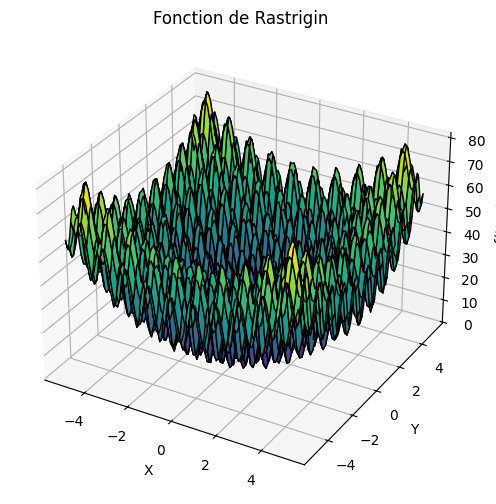

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définition de la fonction Rastrigin
def rastrigin(X):
    A = 10
    return A * len(X) + np.sum(X**2 - A * np.cos(2 * np.pi * X), axis=0)

# Génération des valeurs pour l'affichage 3D
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin(np.array([X, Y]))

# Affichage en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Fonction de Rastrigin')

plt.show()


**Exploration Stochastique avec Metropolis-Hastings**

Dans cette section, nous explorons l'application de l'algorithme de Metropolis-Hastings à la fonction de Rastrigin. L'objectif est d'utiliser Metropolis-Hastings comme un outil exploratoire pour échantillonner l'espace des solutions de la fonction de Rastrigin de manière stochastique.

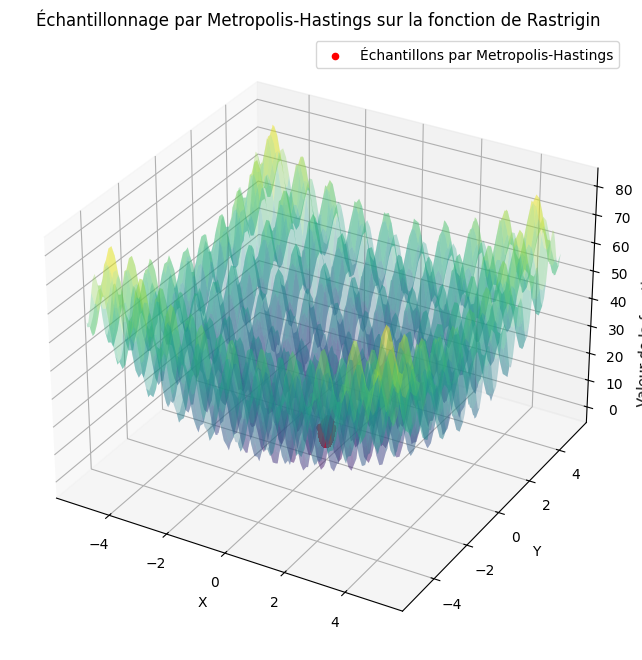

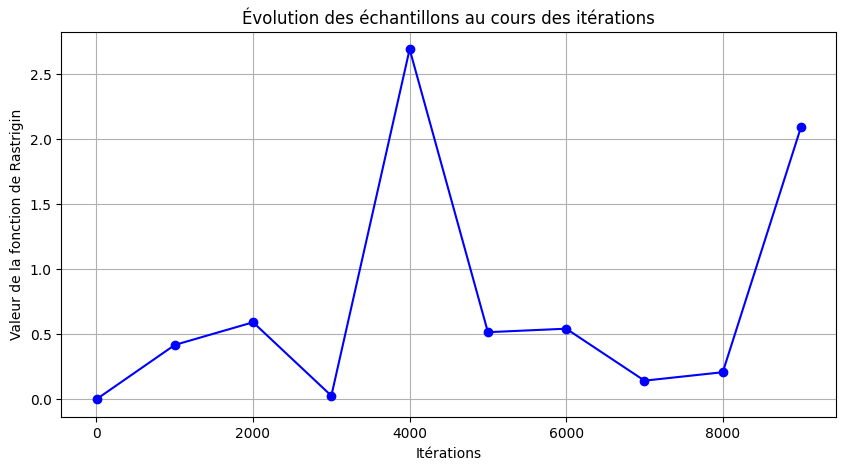

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rastrigin(X, Y):
    """ Fonction de Rastrigin en 2D """
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

def metropolis_hastings(target_function, init, iterations, step_size):
    """ Algorithme de Metropolis-Hastings appliqué à une fonction cible """
    samples = []
    current = np.array(init)
    current_value = target_function(*current)

    for _ in range(iterations):
        proposal = current + np.random.uniform(-step_size, step_size, size=current.shape)
        proposal_value = target_function(*proposal)

        # Calcul du rapport d'acceptation
        alpha = min(1, np.exp(-proposal_value + current_value))

        if np.random.rand() < alpha:
            current = proposal
            current_value = proposal_value

        samples.append(current.copy())

    return np.array(samples)

# Paramètres de l'algorithme
init_point = np.array([0.0, 0.0])  # Point initial
iterations = 10000  # Nombre d'itérations
step_size = 0.5  # Taille du pas

# Exécution de Metropolis-Hastings
sampled_points = metropolis_hastings(rastrigin, init_point, iterations, step_size)

# Visualisation des résultats
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Création d'une grille pour représenter la fonction de Rastrigin
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

# Tracé des points échantillonnés par Metropolis-Hastings
ax.scatter(sampled_points[:, 0], sampled_points[:, 1], rastrigin(sampled_points[:, 0], sampled_points[:, 1]), color='red', marker='o', label='Échantillons par Metropolis-Hastings')

# Tracé de la fonction de Rastrigin
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Valeur de la fonction de Rastrigin')
ax.set_title('Échantillonnage par Metropolis-Hastings sur la fonction de Rastrigin')
ax.legend()

# Création du graphique en 2D
plt.figure(figsize=(10, 5))
iterations = np.arange(1, len(sampled_points) + 1)
function_values = [rastrigin(*point) for point in sampled_points]

plt.plot(iterations[::1000], function_values[::1000], marker='o', linestyle='-', color='b')
plt.title("Évolution des échantillons au cours des itérations")
plt.xlabel("Itérations")
plt.ylabel("Valeur de la fonction de Rastrigin")
plt.grid(True)

plt.show()


**Interprétations :**

Le comportement des échantillons montre une recherche efficace dans un premier temps, mais l'algorithme semble rencontrer des difficultés à explorer les minima locaux plus profonds. C'est normal car Metropolis-Hastings a une tendance à sauter de manière aléatoire dans l'espace de recherche.
Les périodes d'oscillation importantes dans le graphique 2D montrent que l'algorithme explore une gamme plus large de valeurs avant de se stabiliser dans les zones autour du minimum.

**Application des méthodes d'Optimisation Stochastique**

**Méthode 1: l'algorithme de recuit simulé appliqué à la fonction de Rastrigin :**

Initialisation : Choisir une solution initiale aléatoire dans l'intervalle
[
−
5.12
,
5.12
]
[−5.12,5.12] pour chaque coordonnée.

Mutation : Proposer une nouvelle solution voisine en modifiant la solution courante par un petit changement aléatoire.

Évaluation : Calculer la valeur de la fonction de Rastrigin pour la nouvelle solution.

Critère d'acceptation :
Si la nouvelle solution est meilleure (a une valeur plus faible), l'accepter.
Si elle est moins bonne, l'accepter avec une probabilité dépendant de la température (pour éviter de se coincer dans un minimum local).

Meilleure solution trouvée : [0.99413249 0.00792602]
Valeur optimale de la fonction de Rastrigin : 1.0075551672714465


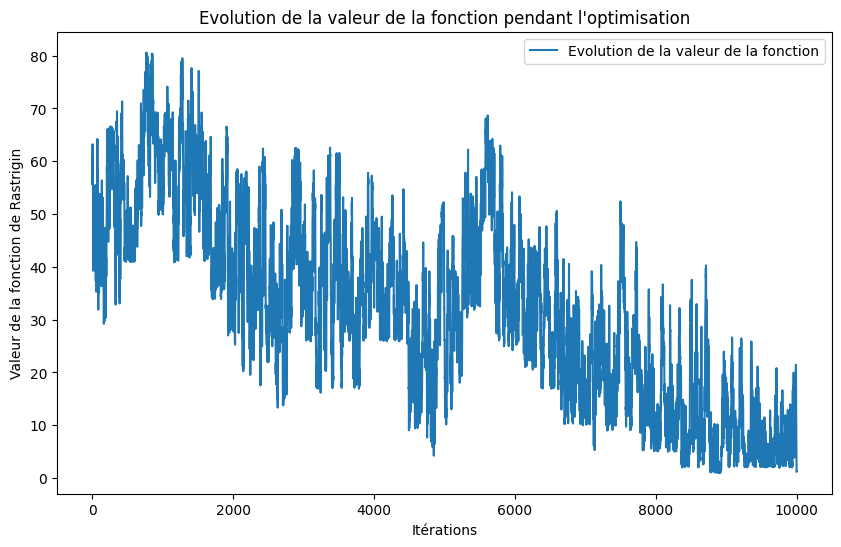

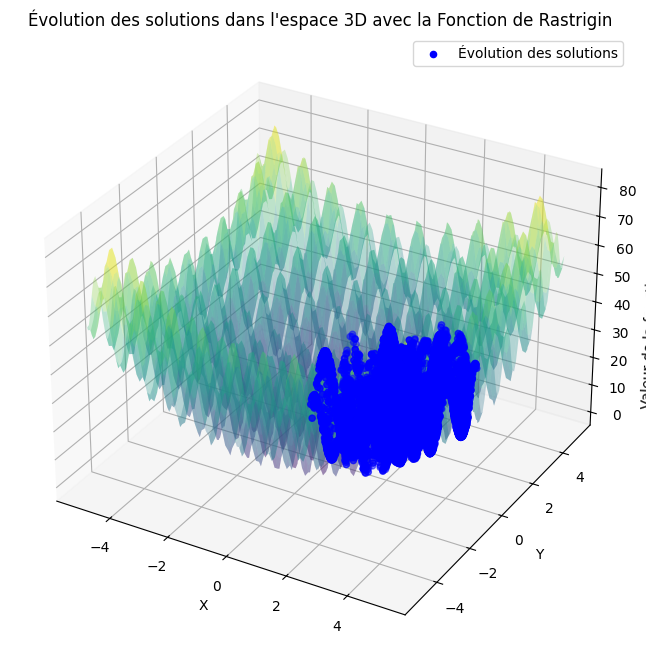

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir la fonction de Rastrigin
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# Fonction de probabilité d'acceptation pour le recuit simulé
def acceptance_probability(old_energy, new_energy, temperature):
    if new_energy < old_energy:
        return 1.0
    return np.exp((old_energy - new_energy) / temperature)

# Algorithme de recuit simulé avec suivi
def simulated_annealing_tracking(initial_solution, max_iterations, initial_temperature, cooling_rate):
    current_solution = initial_solution
    best_solution = current_solution
    current_energy = rastrigin(*current_solution)
    best_energy = current_energy
    temperature = initial_temperature

    # Liste pour suivre les solutions et les valeurs de la fonction à chaque itération
    solutions_tracking = []
    energy_tracking = []

    for _ in range(max_iterations):
        # Mutation : générer une nouvelle solution voisine
        new_solution = current_solution + np.random.uniform(low=-0.1, high=0.1, size=2)
        new_solution = np.clip(new_solution, -5.12, 5.12)  # Limiter les valeurs dans l'intervalle [-5.12, 5.12]
        new_energy = rastrigin(*new_solution)

        # Acceptation ou rejet de la nouvelle solution
        if acceptance_probability(current_energy, new_energy, temperature) > np.random.rand():
            current_solution = new_solution
            current_energy = new_energy

        # Mise à jour de la meilleure solution trouvée
        if current_energy < best_energy:
            best_solution = current_solution
            best_energy = current_energy

        # Mise à jour de la température
        temperature *= 1 - cooling_rate

        # Enregistrement des solutions et valeurs de la fonction
        solutions_tracking.append(current_solution)
        energy_tracking.append(current_energy)

    return best_solution, best_energy, solutions_tracking, energy_tracking

# Paramètres initiaux
np.random.seed(seed=15)  # Choix de n'importe quel nombre entier comme seed pour avoir des résultats stables

initial_solution = np.random.uniform(low=-5.12, high=5.12, size=2)  # Solution initiale aléatoire
max_iterations = 10000  # Nombre d'itérations
initial_temperature = 100.0  # Température de départ
cooling_rate = 0.0003  # Taux de refroidissement

# Exécution de l'algorithme de recuit simulé
best_solution, best_energy, solutions_tracking, energy_tracking = simulated_annealing_tracking(
    initial_solution, max_iterations, initial_temperature, cooling_rate
)

# Affichage des résultats
print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Rastrigin :", best_energy)

# Tracé de l'évolution de la valeur de la fonction au fil des itérations
plt.figure(figsize=(10, 6))
plt.plot(energy_tracking, label='Evolution de la valeur de la fonction')
plt.xlabel('Itérations')
plt.ylabel('Valeur de la fonction de Rastrigin')
plt.title('Evolution de la valeur de la fonction pendant l\'optimisation')
plt.legend()
plt.show()

# Tracé de l'évolution des solutions dans l'espace 3D avec la fonction objective
solutions_tracking = np.array(solutions_tracking)
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

# Création d'une grille pour représenter la fonction de Rastrigin
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

# Tracé de la fonction de Rastrigin
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)

# Tracé de l'évolution des solutions
ax.scatter(solutions_tracking[:, 0], solutions_tracking[:, 1], energy_tracking, color='blue', marker='o', label='Évolution des solutions')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Valeur de la fonction de Rastrigin')
ax.set_title('Évolution des solutions dans l\'espace 3D avec la Fonction de Rastrigin')
ax.legend()

plt.show()


Le graphique montre l'évolution des solutions générées par l'algorithme de recuit simulé appliqué à la fonction de Rastrigin.

**Visualisation 3D de la fonction de Rastrigin :**

La surface ondulée est caractéristique de la fonction de Rastrigin avec ses nombreux minima et maxima locaux.
Les points bleus représentent les échantillons générés par l'algorithme au fil des itérations.

**Concentration des solutions :**

Les points bleus sont majoritairement concentrés dans une région spécifique de l'espace, ce qui indique que l'algorithme s'est orienté vers cette zone. Cela peut indiquer que le recuit simulé a commencé à se concentrer autour de certaines solutions optimales, même si des points sont toujours explorés dans d'autres parties de l'espace.

**Exploration initiale :**

Au début de l'algorithme, l'exploration est large, ce qui est typique du recuit simulé. Cela permet à l'algorithme de ne pas se coincer dans un minimum local en acceptant des solutions plus mauvaises avec une certaine probabilité.
Cependant, après plusieurs itérations, on peut voir une convergence des points vers les zones de plus faible valeur (minima de la fonction).

**Comportement de l'algorithme :**

Il est normal que les solutions soient réparties à travers l'espace au début (plusieurs solutions moins optimales), mais avec le refroidissement progressif de la température, l'algorithme réduit l'acceptation de mauvaises solutions et se concentre sur une solution optimale.
La température a une influence clé dans la recherche : elle permet une exploration large au début, mais devient plus stricte vers la fin.

**Étude des Paramètres pour le Recuit Simulé**

Dans cette section, nous entreprenons une étude approfondie des paramètres de l'algorithme de Recuit Simulé.
 L'objectif est d'évaluer l'impact des différentes combinaisons de initial_temperature et cooling_rate sur la convergence de l'algorithme vers des minima locaux de la fonction de Rastrigin. Pour ce faire, nous allons expérimenter avec plusieurs ensembles de paramètres afin de visualiser la trajectoire de convergence à chaque itération.

Cette exploration nous permettra d'identifier les valeurs optimales de initial_temperature et cooling_rate qui favorisent une convergence rapide et stable vers des solutions optimales. Les résultats obtenus orienteront nos choix de paramètres pour l'application finale de l'algorithme de Recuit Simulé à la fonction de Rastrigin.

Test avec initial_temperature=50 et cooling_rate=0.001...
Test avec initial_temperature=50 et cooling_rate=0.01...
Test avec initial_temperature=50 et cooling_rate=0.1...


<ipython-input-19-dcb862f59b03>:13: RuntimeWarning: overflow encountered in scalar divide
  return np.exp((old_energy - new_energy) / temperature)


Test avec initial_temperature=100 et cooling_rate=0.001...
Test avec initial_temperature=100 et cooling_rate=0.01...
Test avec initial_temperature=100 et cooling_rate=0.1...
Test avec initial_temperature=200 et cooling_rate=0.001...
Test avec initial_temperature=200 et cooling_rate=0.01...
Test avec initial_temperature=200 et cooling_rate=0.1...


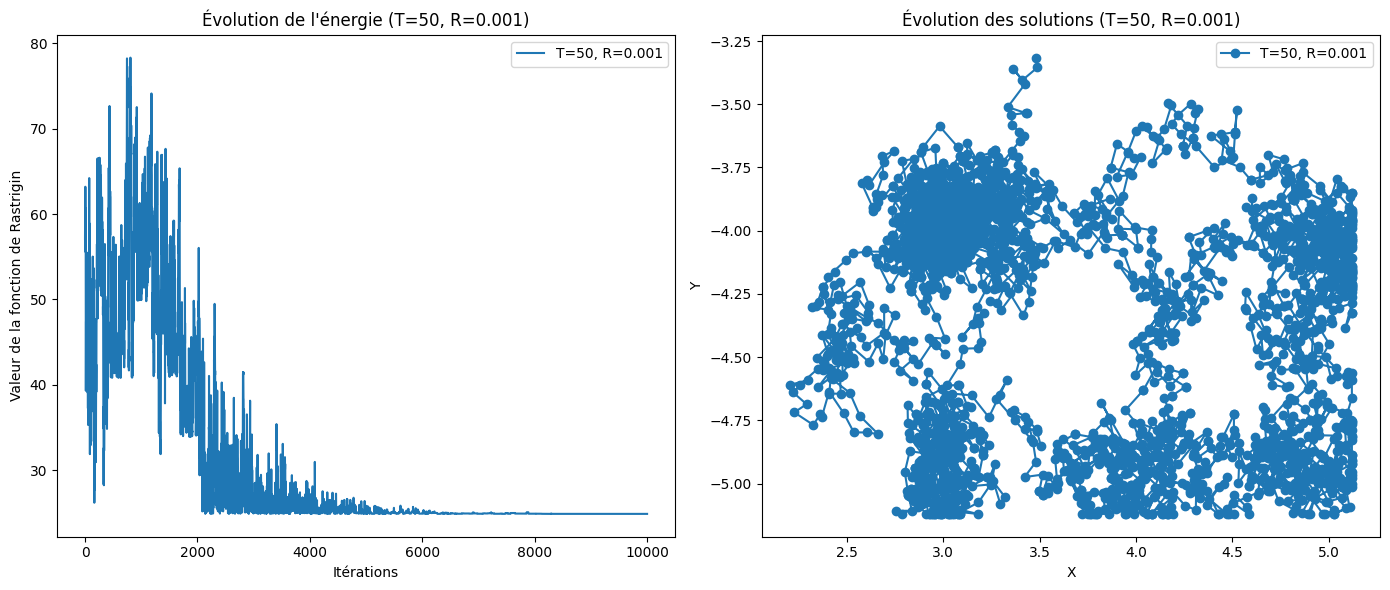

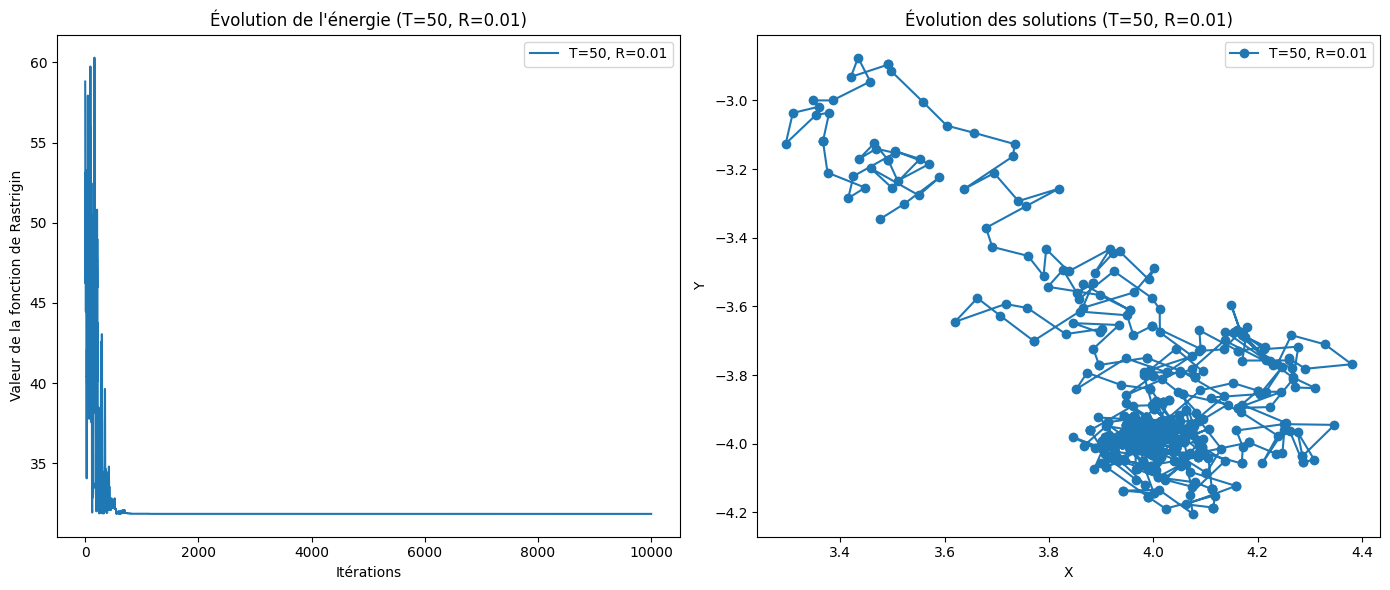

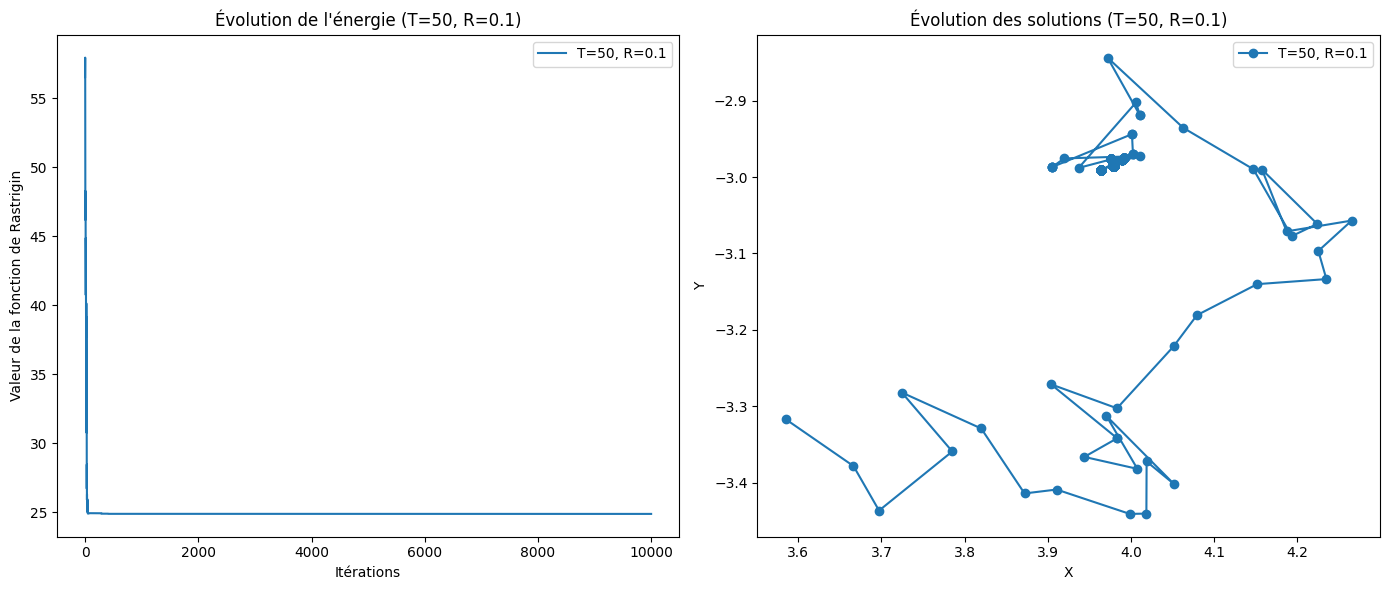

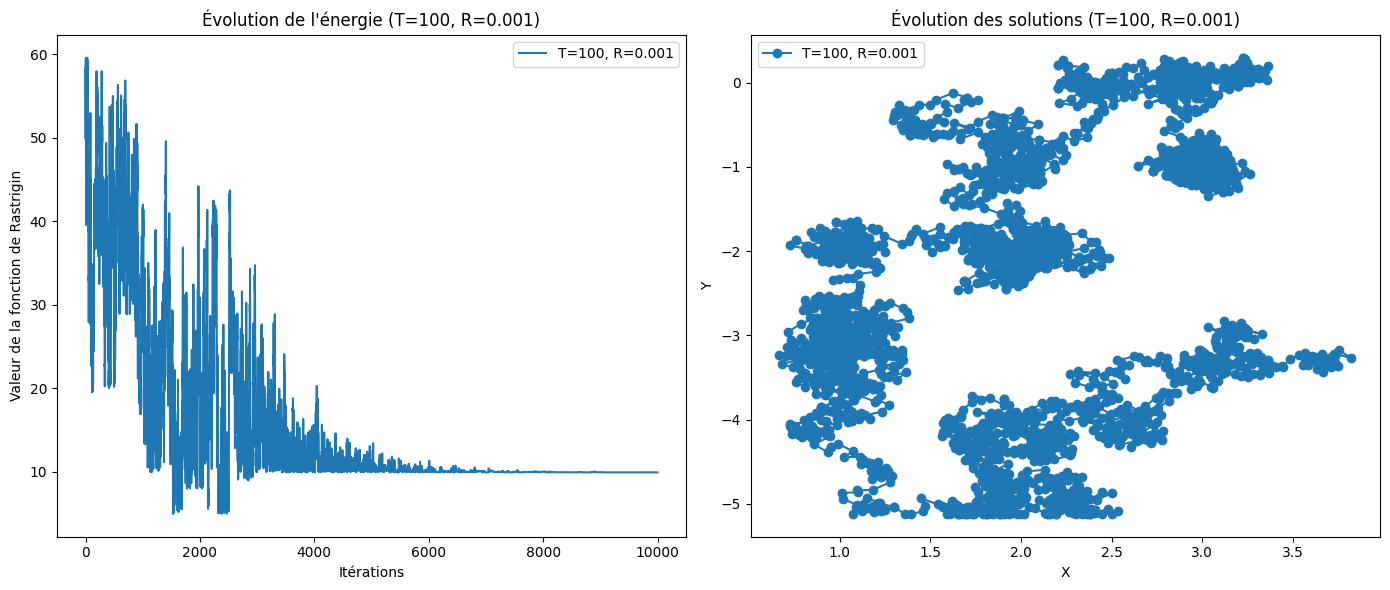

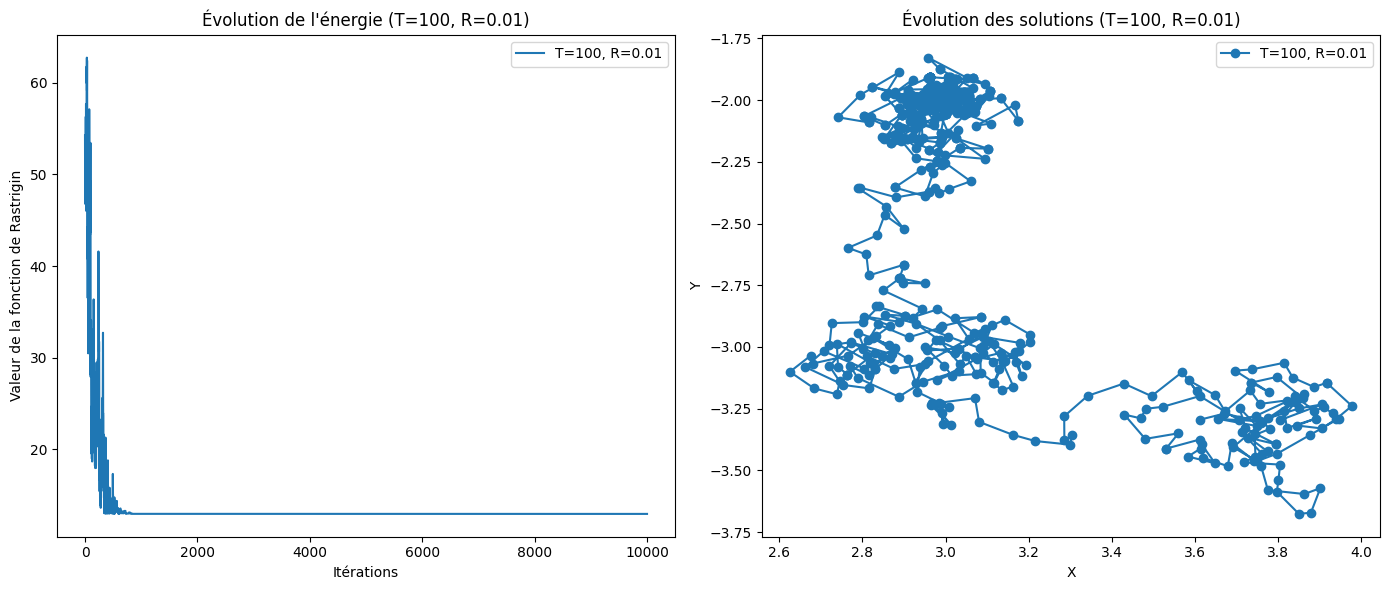

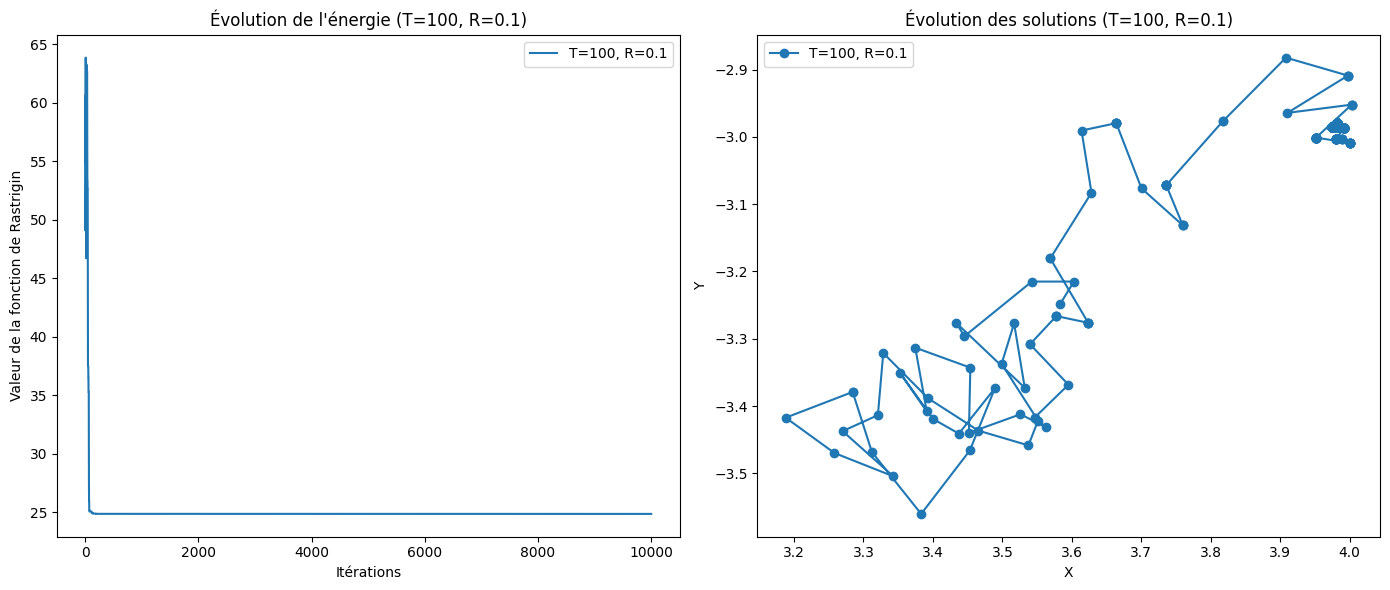

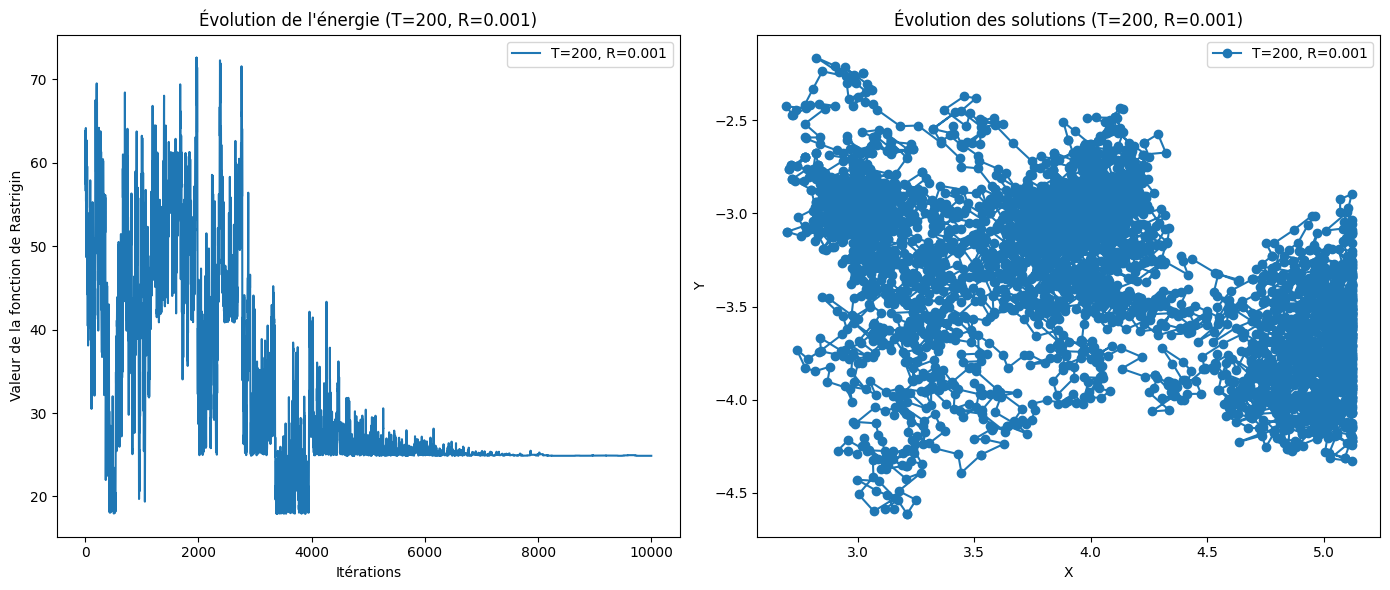

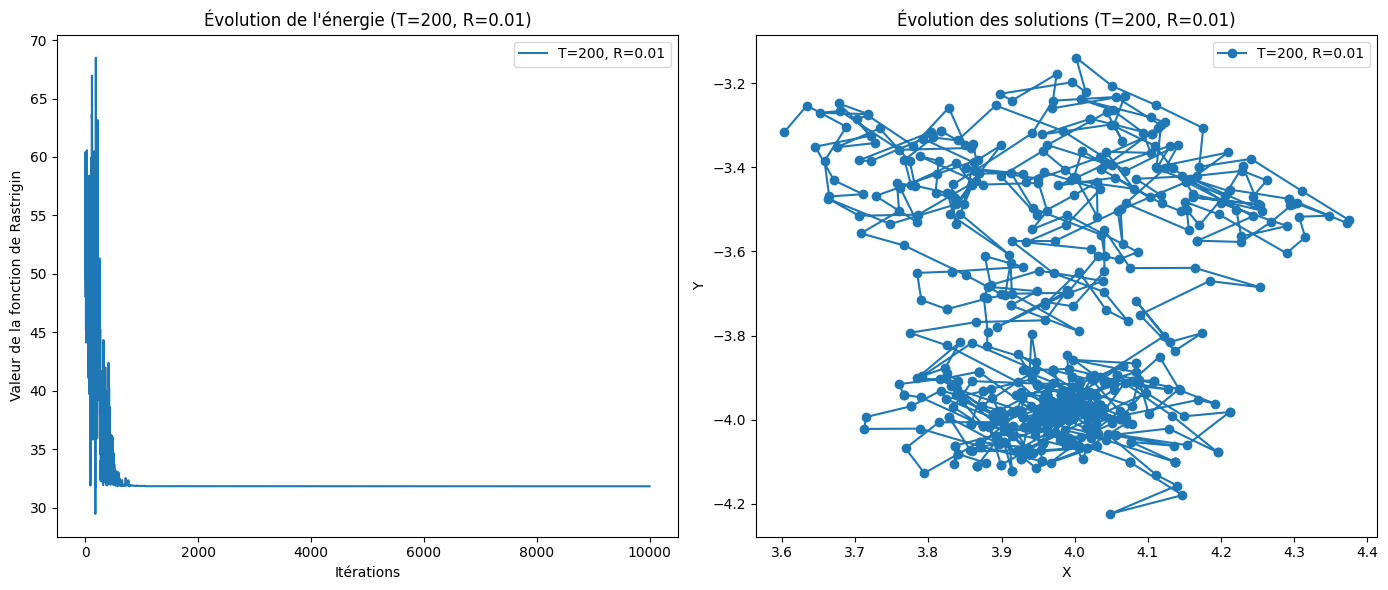

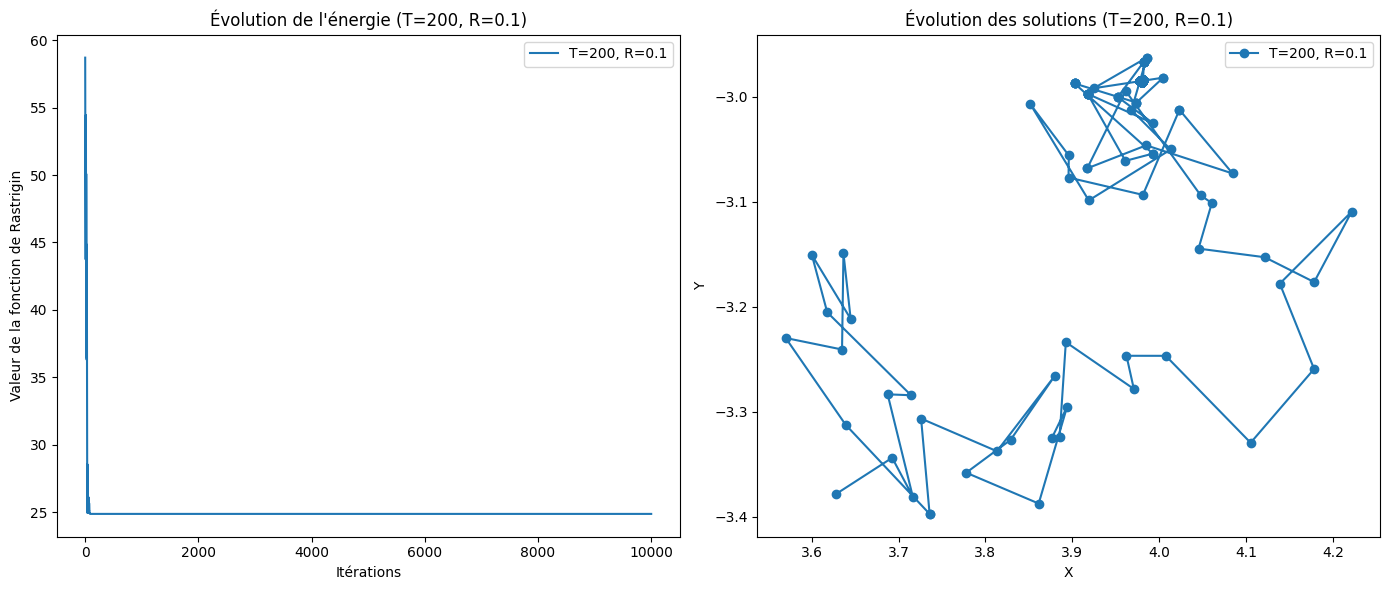

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de Rastrigin (appliquée ici à l'exploration des paramètres)
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# Fonction de probabilité d'acceptation pour le recuit simulé
def acceptance_probability(old_energy, new_energy, temperature):
    if new_energy < old_energy:
        return 1.0
    return np.exp((old_energy - new_energy) / temperature)

# Algorithme de Recuit Simulé avec suivi
def simulated_annealing_tracking(initial_solution, max_iterations, initial_temperature, cooling_rate):
    current_solution = initial_solution
    best_solution = current_solution
    current_energy = rastrigin(*current_solution)
    best_energy = current_energy
    temperature = initial_temperature

    solutions_tracking = []
    energy_tracking = []

    for _ in range(max_iterations):
        new_solution = current_solution + np.random.uniform(low=-0.1, high=0.1, size=2)
        new_solution = np.clip(new_solution, -5.12, 5.12)
        new_energy = rastrigin(*new_solution)

        if acceptance_probability(current_energy, new_energy, temperature) > np.random.rand():
            current_solution = new_solution
            current_energy = new_energy

        if current_energy < best_energy:
            best_solution = current_solution
            best_energy = current_energy

        temperature *= 1 - cooling_rate

        solutions_tracking.append(current_solution)
        energy_tracking.append(current_energy)

    return best_solution, best_energy, solutions_tracking, energy_tracking

# Paramètres initiaux
np.random.seed(seed=15)

initial_solution = np.random.uniform(low=-5.12, high=5.12, size=2)
max_iterations = 10000

# Définir différentes valeurs de température et de taux de refroidissement
temperatures = [50, 100, 200]
cooling_rates = [0.001, 0.01, 0.1]

# Suivi des résultats pour les différentes combinaisons de paramètres
results = {}

for temp in temperatures:
    for rate in cooling_rates:
        print(f"Test avec initial_temperature={temp} et cooling_rate={rate}...")
        best_solution, best_energy, solutions_tracking, energy_tracking = simulated_annealing_tracking(
            initial_solution, max_iterations, temp, rate
        )

        # Stocker les résultats pour chaque combinaison de paramètres
        results[(temp, rate)] = {
            "best_solution": best_solution,
            "best_energy": best_energy,
            "solutions_tracking": solutions_tracking,
            "energy_tracking": energy_tracking
        }

# Visualisation des résultats
for temp in temperatures:
    for rate in cooling_rates:
        fig, ax = plt.subplots(1, 2, figsize=(14, 6))

        # Tracé de l'évolution de l'énergie
        ax[0].plot(results[(temp, rate)]["energy_tracking"], label=f"T={temp}, R={rate}")
        ax[0].set_title(f"Évolution de l'énergie (T={temp}, R={rate})")
        ax[0].set_xlabel("Itérations")
        ax[0].set_ylabel("Valeur de la fonction de Rastrigin")
        ax[0].legend()

        # Tracé des solutions dans l'espace 2D
        solutions_tracking = np.array(results[(temp, rate)]["solutions_tracking"])
        ax[1].plot(solutions_tracking[:, 0], solutions_tracking[:, 1], label=f"T={temp}, R={rate}", marker='o')
        ax[1].set_title(f"Évolution des solutions (T={temp}, R={rate})")
        ax[1].set_xlabel("X")
        ax[1].set_ylabel("Y")
        ax[1].legend()

        plt.tight_layout()
        plt.show()


In [21]:

import pandas as pd
# Paramètres de l'étude
initial_temperatures = [100, 200, 500, 1000, 2000, 5000]
cooling_rates = [0.0003, 0.003, 0.03, 0.3]

# Paramètres fixes
seeds = [8, 5, 42 ,6, 42, 15, 8, 15, 46, 14, 8, 36, 7, 14 , 92 , 15, 5, 46, 14, 8, 36, 7, 5 , 8]  # Choix de n'importe quel nombre entier comme seed pour avoir des résultats stables à chaque exécution
max_iterations = 10000

# Liste pour stocker les résultats
results = []
energy_tracking_list=[]
i = 0
# Boucle d'expérimentation
for initial_temperature in initial_temperatures:
    for cooling_rate in cooling_rates:
        np.random.seed(seed=seeds[i])
        initial_solution = np.random.uniform(low=-500, high=500, size=2)

        # Exécution de l'algorithme
        best_solution, best_energy, _, energy_tracking = simulated_annealing_tracking(
            initial_solution, max_iterations, initial_temperature, cooling_rate
        )

        # Enregistrement des résultats
        results.append({
            'Initial Temperature': initial_temperature,
            'Cooling Rate': cooling_rate,
            'Solution optimale': best_solution,
            'Valeur minimale de la fonction': best_energy
        })
        energy_tracking_list.append(energy_tracking)
        i+=1
# Création d'un DataFrame pour faciliter l'analyse
df_results = pd.DataFrame(results)

# Affichage du tableau des résultats
df_results


<ipython-input-19-dcb862f59b03>:13: RuntimeWarning: overflow encountered in scalar divide
  return np.exp((old_energy - new_energy) / temperature)


Initial Temperature  Cooling Rate  \
0                   100        0.0003   
1                   100        0.0030   
2                   100        0.0300   
3                   100        0.3000   
4                   200        0.0003   
5                   200        0.0030   
6                   200        0.0300   
7                   200        0.3000   
8                   500        0.0003   
9                   500        0.0030   
10                  500        0.0300   
11                  500        0.3000   
12                 1000        0.0003   
13                 1000        0.0030   
14                 1000        0.0300   
15                 1000        0.3000   
16                 2000        0.0003   
17                 2000        0.0030   
18                 2000        0.0300   
19                 2000        0.3000   
20                 5000        0.0003   
21                 5000        0.0030   
22                 5000        0.0300   
23                 5000        0.3000   

                                  Solution optimale  \
0    [-0.0010726083838585102, -0.04014873080219372]   
1          [-1.988990473399063, 3.9801931241799666]   
2           [-4.975036806710501, 3.978721318345351]   
3           [4.973616037983934, -4.974531024109009]   
4          [0.9894857320556185, 0.9957926390846976]   
5          [4.958980624796139, -3.9663509167084836]   
6            [4.975282768414465, 4.974346454724579]   
7            [4.974566330547782, -4.97421246737578]   
8    [-0.004455455971904651, -0.017538804672264846]   
9           [3.969793215248769, 3.9871291386827705]   
10           [4.973703747013819, 4.975229062212193]   
11           [4.975291604620694, 4.975454096742327]   
12  [0.017691809296916335, -0.00026664928539947563]   
13          [3.985149524353049, 3.9749829219532726]   
14          [3.9798538326081903, 4.974072248518455]   
15          [4.974564584525875, -4.974049001224477]   
16       [0.027036146428762717, 1.9857157566994226]   
17       [-0.0001043233803930746, 3.97965394181969]   
18         [3.9790712518537217, 3.9795201025449947]   
19           [4.974290740160902, 4.974870560521953]   
20         [-2.022283438950751, 2.9726969804894026]   
21        [-1.9904127884554463, 1.9901609621891092]   
22         [-4.973750309213874, 3.9797817735632446]   
23          [4.974554590527394, 4.9748496544441805]   

    Valeur minimale de la fonction  
0                         0.318337  
1                        19.899276  
2                        40.793212  
3                        49.747677  
4                         1.995993  
5                        40.876392  
6                        49.747538  
7                        49.747494  
8                         0.064904  
9                        31.868709  
10                       49.747694  
11                       49.747630  
12                        0.062047  
13                       31.848691  
14                       40.793043  
15                       49.747530  
16                        4.127985  
17                       15.919249  
18                       31.838601  
19                       49.747484  
20                       13.171199  
21                        7.959724  
22                       40.793140  
23                       49.747454

Test avec initial_temperature=50 et cooling_rate=0.001...
Test avec initial_temperature=50 et cooling_rate=0.01...
Test avec initial_temperature=50 et cooling_rate=0.1...


<ipython-input-22-b71a76d2e300>:13: RuntimeWarning: overflow encountered in scalar divide
  return np.exp((old_energy - new_energy) / temperature)


Test avec initial_temperature=100 et cooling_rate=0.001...
Test avec initial_temperature=100 et cooling_rate=0.01...
Test avec initial_temperature=100 et cooling_rate=0.1...
Test avec initial_temperature=200 et cooling_rate=0.001...
Test avec initial_temperature=200 et cooling_rate=0.01...
Test avec initial_temperature=200 et cooling_rate=0.1...


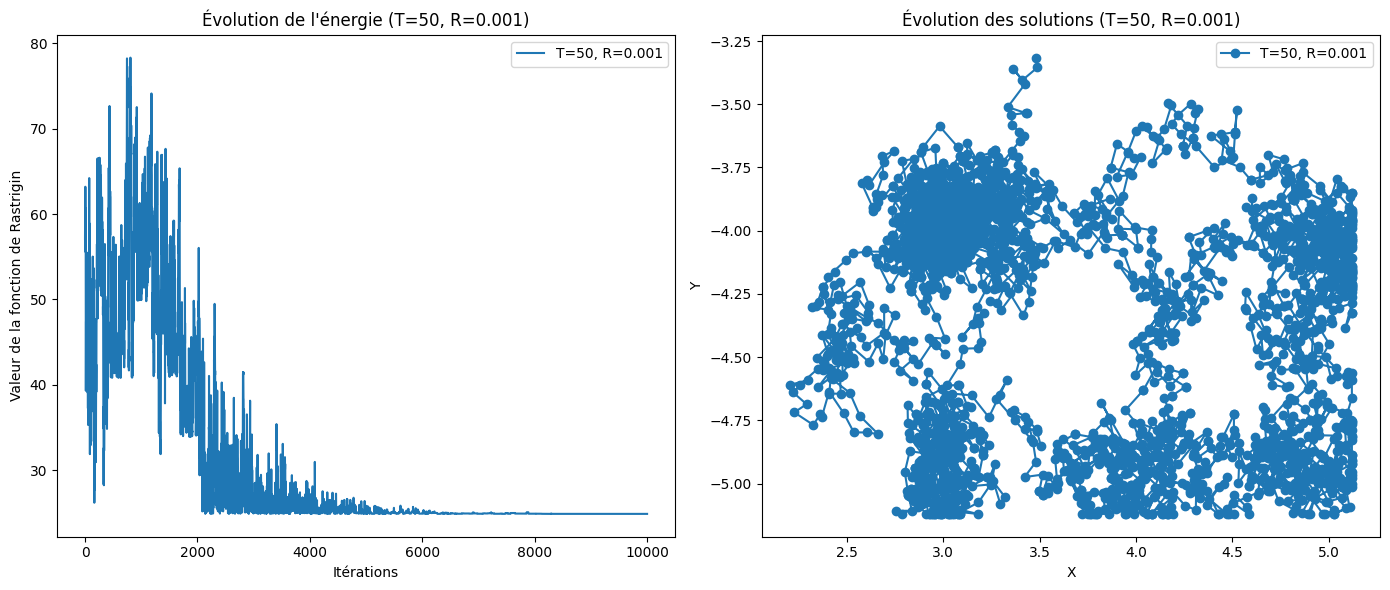

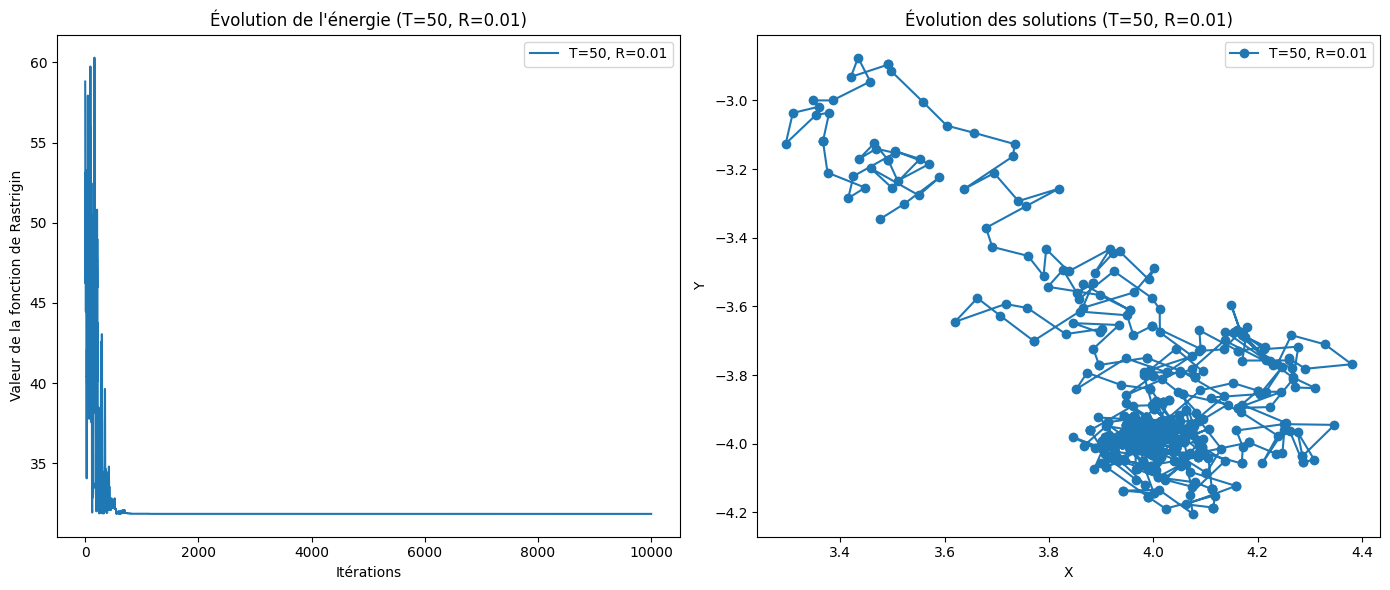

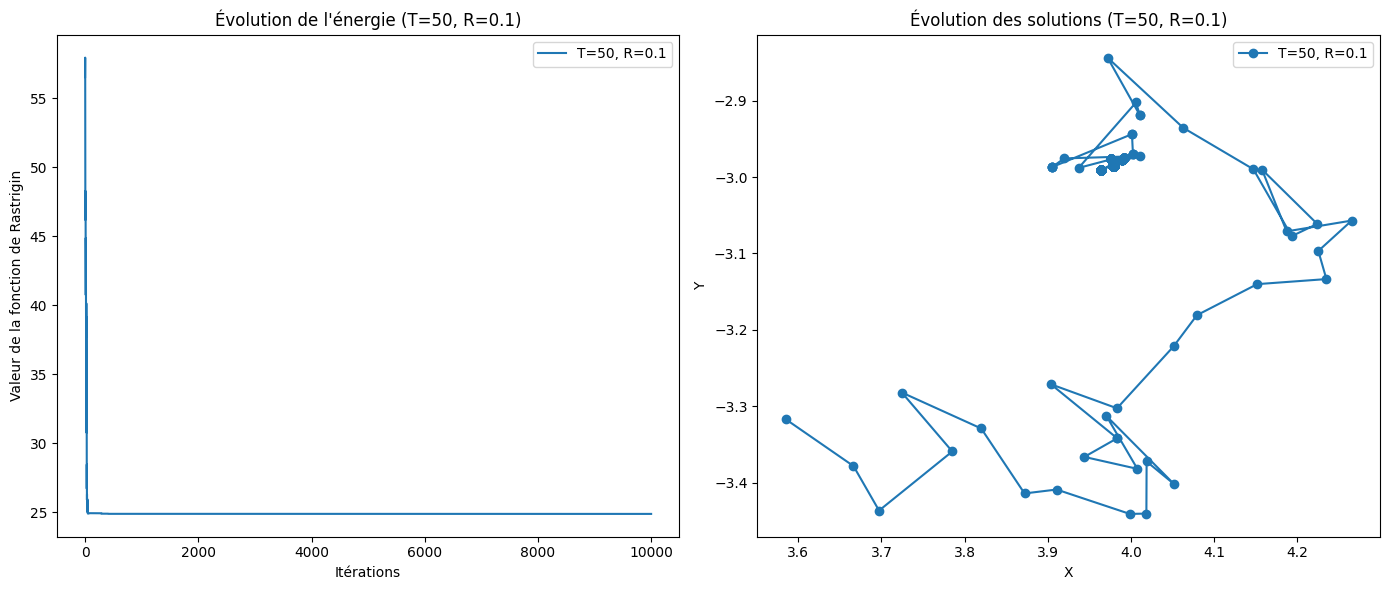

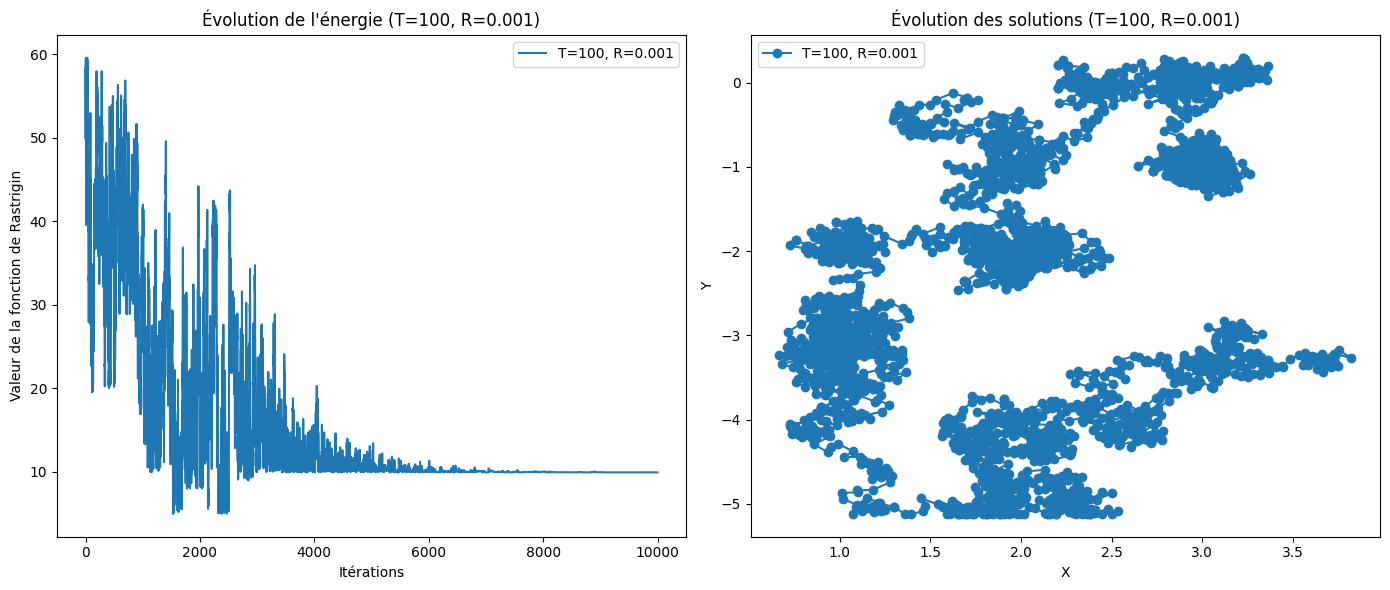

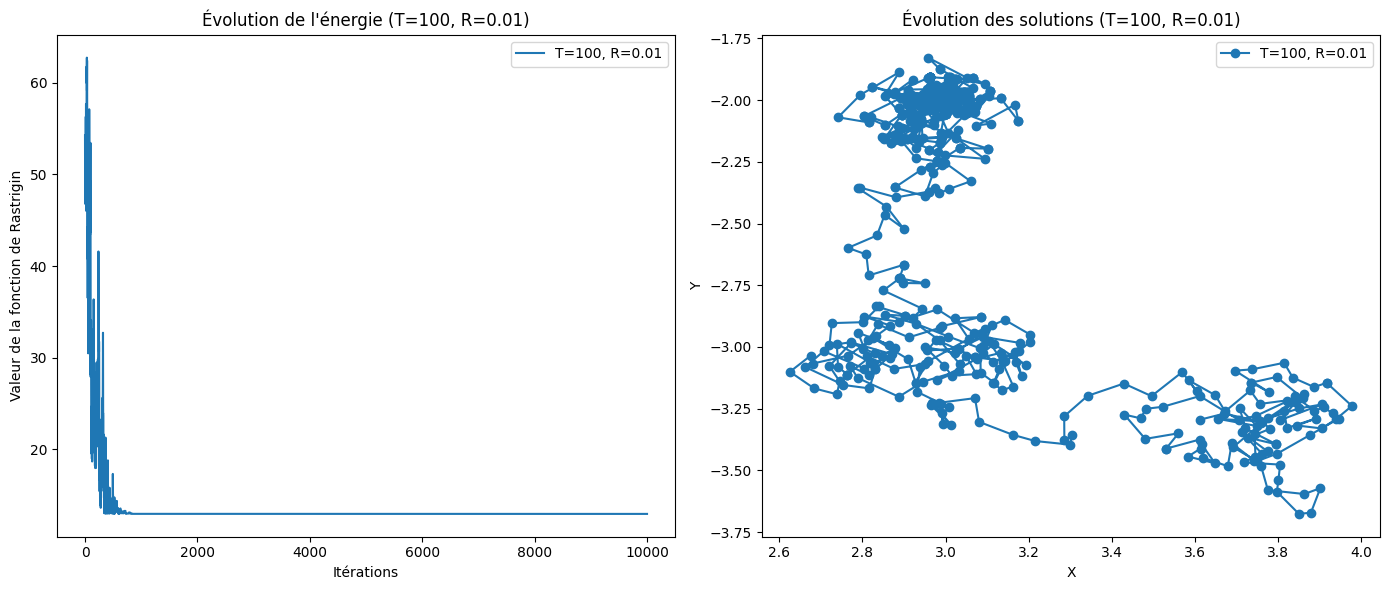

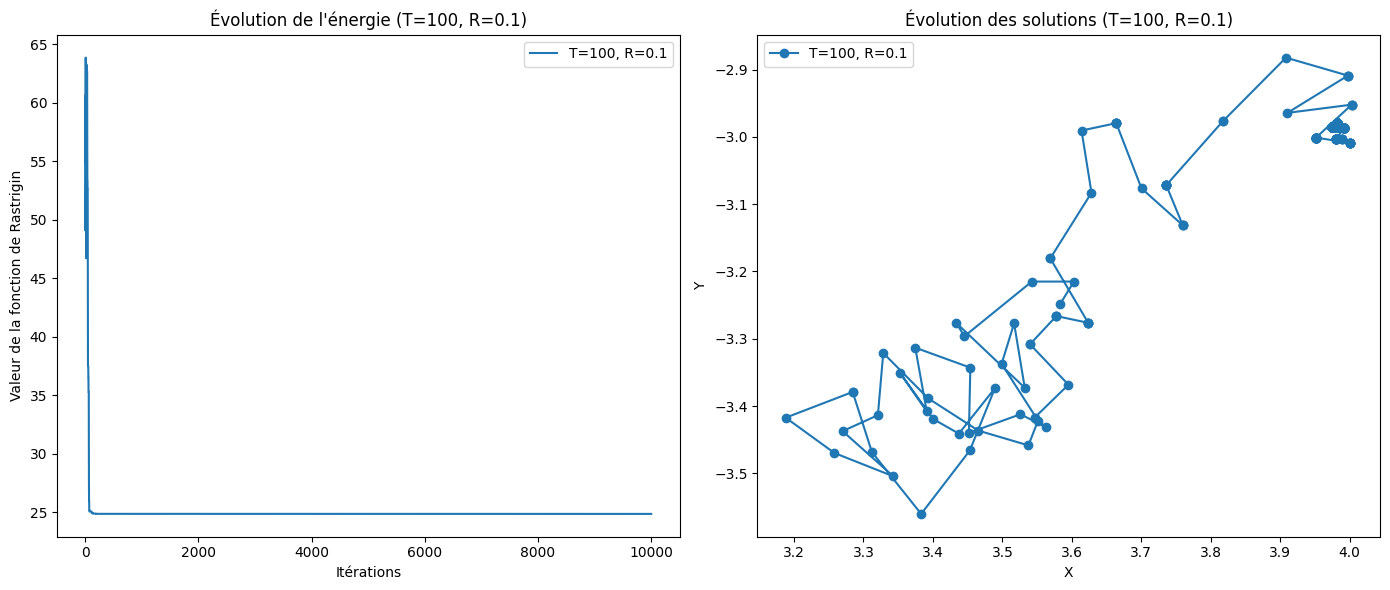

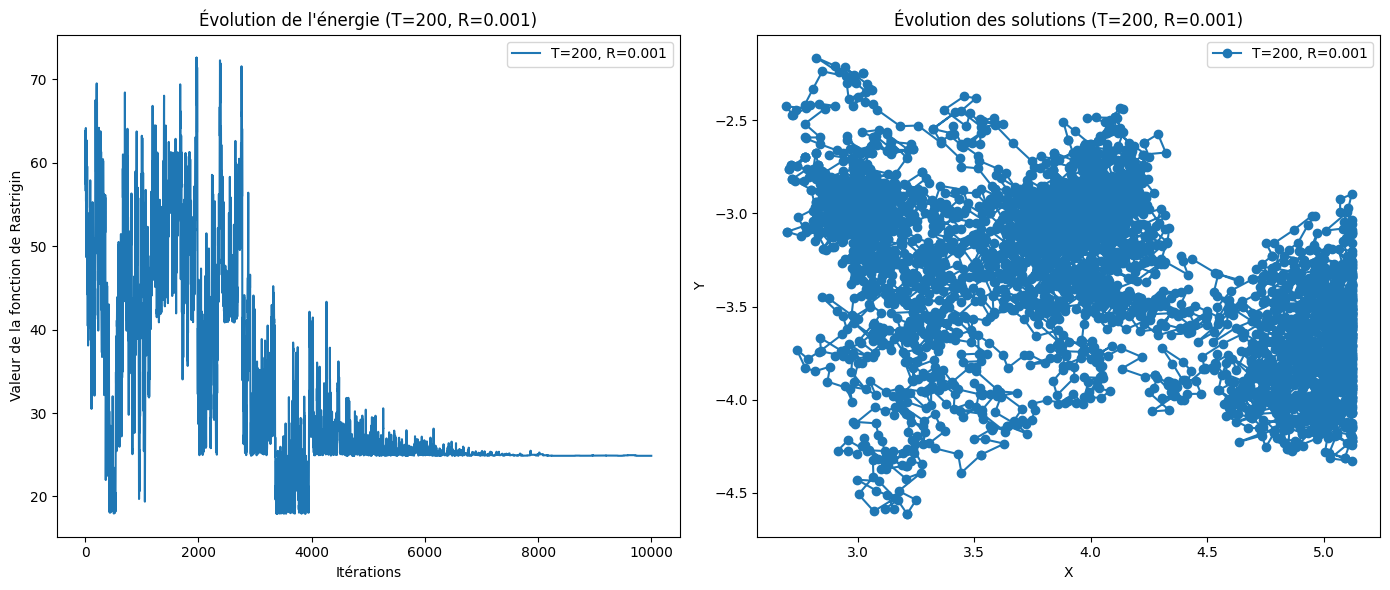

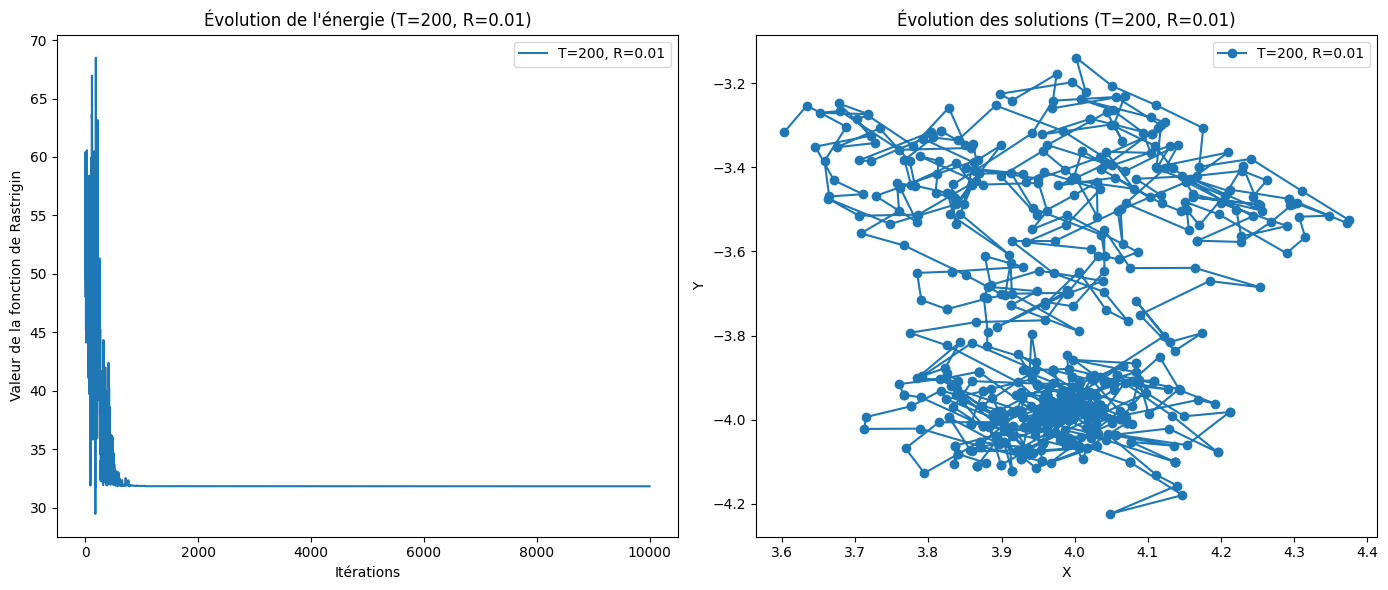

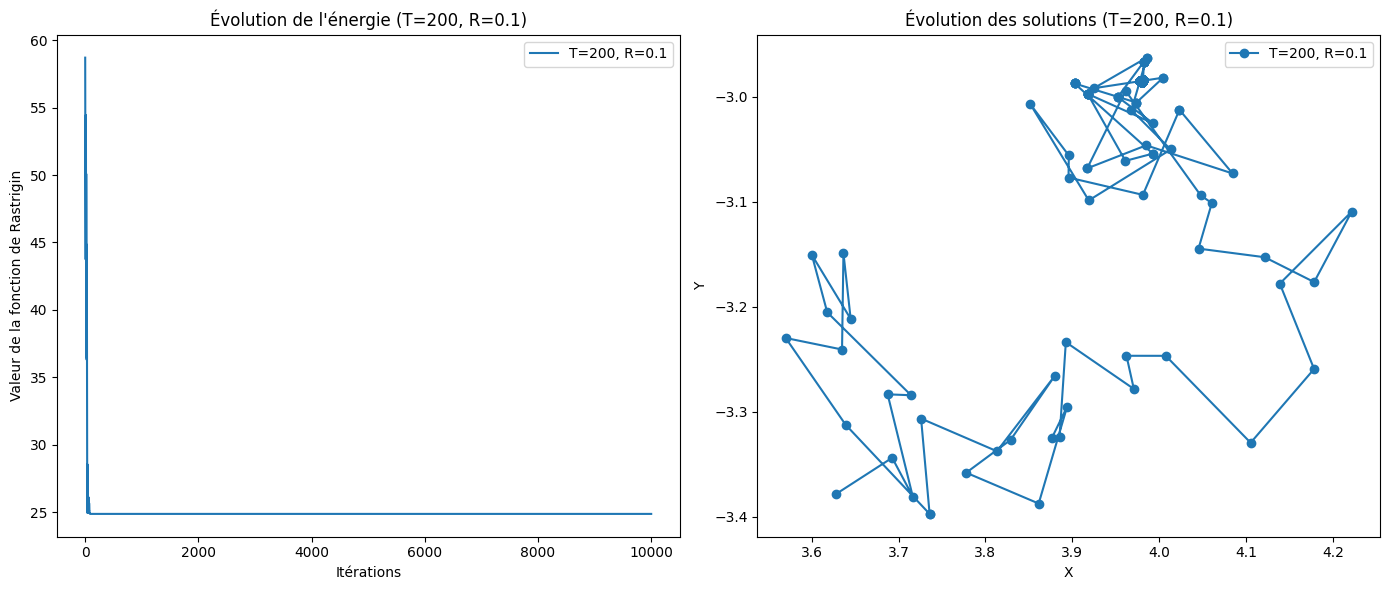

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de Rastrigin (appliquée ici à l'exploration des paramètres)
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# Fonction de probabilité d'acceptation pour le recuit simulé
def acceptance_probability(old_energy, new_energy, temperature):
    if new_energy < old_energy:
        return 1.0
    return np.exp((old_energy - new_energy) / temperature)

# Algorithme de Recuit Simulé avec suivi
def simulated_annealing_tracking(initial_solution, max_iterations, initial_temperature, cooling_rate):
    current_solution = initial_solution
    best_solution = current_solution
    current_energy = rastrigin(*current_solution)
    best_energy = current_energy
    temperature = initial_temperature

    solutions_tracking = []
    energy_tracking = []

    for _ in range(max_iterations):
        new_solution = current_solution + np.random.uniform(low=-0.1, high=0.1, size=2)
        new_solution = np.clip(new_solution, -5.12, 5.12)
        new_energy = rastrigin(*new_solution)

        if acceptance_probability(current_energy, new_energy, temperature) > np.random.rand():
            current_solution = new_solution
            current_energy = new_energy

        if current_energy < best_energy:
            best_solution = current_solution
            best_energy = current_energy

        temperature *= 1 - cooling_rate

        solutions_tracking.append(current_solution)
        energy_tracking.append(current_energy)

    return best_solution, best_energy, solutions_tracking, energy_tracking

# Paramètres initiaux
np.random.seed(seed=15)

initial_solution = np.random.uniform(low=-5.12, high=5.12, size=2)
max_iterations = 10000

# Définir différentes valeurs de température et de taux de refroidissement
temperatures = [50, 100, 200]
cooling_rates = [0.001, 0.01, 0.1]

# Suivi des résultats pour les différentes combinaisons de paramètres
results = {}

# Effectuer les tests pour chaque combinaison de paramètres
for temp in temperatures:
    for rate in cooling_rates:
        print(f"Test avec initial_temperature={temp} et cooling_rate={rate}...")
        best_solution, best_energy, solutions_tracking, energy_tracking = simulated_annealing_tracking(
            initial_solution, max_iterations, temp, rate
        )

        # Stocker les résultats
        results[(temp, rate)] = {
            "best_solution": best_solution,
            "best_energy": best_energy,
            "solutions_tracking": solutions_tracking,
            "energy_tracking": energy_tracking
        }

# Visualisation de la convergence pour chaque combinaison de paramètres
for temp in temperatures:
    for rate in cooling_rates:
        fig, ax = plt.subplots(1, 2, figsize=(14, 6))

        # Tracé de l'évolution de l'énergie
        ax[0].plot(results[(temp, rate)]["energy_tracking"], label=f"T={temp}, R={rate}")
        ax[0].set_title(f"Évolution de l'énergie (T={temp}, R={rate})")
        ax[0].set_xlabel("Itérations")
        ax[0].set_ylabel("Valeur de la fonction de Rastrigin")
        ax[0].legend()

        # Tracé des solutions dans l'espace 2D
        solutions_tracking = np.array(results[(temp, rate)]["solutions_tracking"])
        ax[1].plot(solutions_tracking[:, 0], solutions_tracking[:, 1], label=f"T={temp}, R={rate}", marker='o')
        ax[1].set_title(f"Évolution des solutions (T={temp}, R={rate})")
        ax[1].set_xlabel("X")
        ax[1].set_ylabel("Y")
        ax[1].legend()

        plt.tight_layout()
        plt.show()


Nous observons une influence significative des paramètres choisis sur les résultats obtenus. Pour chaque combinaison spécifique de initial_temperature et cooling_rate, les algorithmes convergent vers des minima locaux différents. Les résultats varient, montrant l'importance de choisir judicieusement les paramètres pour optimiser la fonction de Rastrigin.

<ipython-input-25-7383984d0c5a>:13: RuntimeWarning: overflow encountered in scalar divide
  return np.exp((old_energy - new_energy) / temperature)


Meilleure solution trouvée : [3.97847458 4.97443184]
Valeur optimale de la fonction de Rastrigin : 40.793317162949165


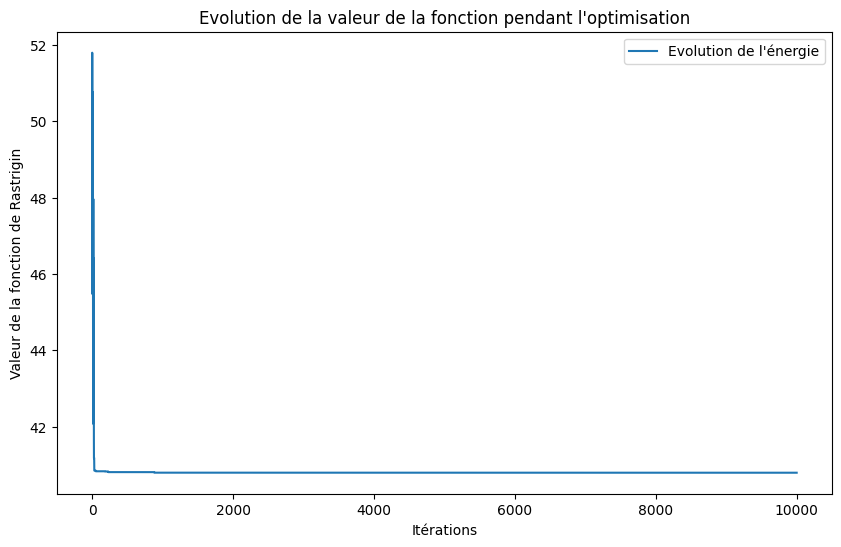

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la fonction de Rastrigin
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# Fonction de probabilité d'acceptation pour le recuit simulé
def acceptance_probability(old_energy, new_energy, temperature):
    if new_energy < old_energy:
        return 1.0
    return np.exp((old_energy - new_energy) / temperature)

# Algorithme de Recuit Simulé avec suivi
def simulated_annealing_tracking(initial_solution, max_iterations, initial_temperature, cooling_rate):
    current_solution = initial_solution
    best_solution = current_solution
    current_energy = rastrigin(*current_solution)
    best_energy = current_energy
    temperature = initial_temperature

    solutions_tracking = []
    energy_tracking = []

    for _ in range(max_iterations):
        # Mutation : générer une nouvelle solution voisine
        new_solution = current_solution + np.random.uniform(low=-0.1, high=0.1, size=2)
        new_solution = np.clip(new_solution, -5.12, 5.12)  # Limiter les valeurs dans l'intervalle [-5.12, 5.12]
        new_energy = rastrigin(*new_solution)

        # Acceptation ou rejet de la nouvelle solution
        if acceptance_probability(current_energy, new_energy, temperature) > np.random.rand():
            current_solution = new_solution
            current_energy = new_energy

        # Mise à jour de la meilleure solution trouvée
        if current_energy < best_energy:
            best_solution = current_solution
            best_energy = current_energy

        # Mise à jour de la température
        temperature *= 1 - cooling_rate

        # Enregistrement des solutions et valeurs de la fonction
        solutions_tracking.append(current_solution)
        energy_tracking.append(current_energy)

    return best_solution, best_energy, solutions_tracking, energy_tracking

# Paramètres initiaux
np.random.seed(seed=8)  # Choix de n'importe quel nombre entier comme seed pour avoir des résultats stables

initial_solution = np.random.uniform(low=-5.12, high=5.12, size=2)  # Solution initiale aléatoire
max_iterations = 10000  # Nombre d'itérations
initial_temperature = 5000  # Température de départ
cooling_rate = 0.3  # Taux de refroidissement

# Exécution de l'algorithme de recuit simulé
best_solution, best_energy, solutions_tracking, energy_tracking = simulated_annealing_tracking(
    initial_solution, max_iterations, initial_temperature, cooling_rate
)

# Affichage des résultats
print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Rastrigin :", best_energy)

# Visualisation de l'évolution de l'énergie
plt.figure(figsize=(10, 6))
plt.plot(energy_tracking, label="Evolution de l'énergie")
plt.xlabel("Itérations")
plt.ylabel("Valeur de la fonction de Rastrigin")
plt.title("Evolution de la valeur de la fonction pendant l'optimisation")
plt.legend()
plt.show()




Étapes de l'algorithme génétique pour la fonction de Rastrigin :
Initialisation de la population : Créer une population initiale d'individus (solutions potentielles), chaque individu étant une paire de coordonnées
(
𝑋
,
𝑌
)
(X,Y) tirées aléatoirement dans l'intervalle
[
−
5.12
,
5.12
]
[−5.12,5.12].
Évaluation de la population : Calculer la valeur de la fonction de Rastrigin pour chaque individu de la population.

Sélection : Choisir les individus les plus aptes (c'est-à-dire ceux ayant la plus faible valeur de la fonction) pour la reproduction.

Croisement (crossover) : Créer de nouveaux individus en combinant les gènes de deux parents sélectionnés.

Mutation : Introduire des variations aléatoires dans certains individus pour maintenir la diversité génétique.

Remplacement : Remplacer la population actuelle par la nouvelle génération et répéter les étapes jusqu'à convergence ou un nombre d'itérations fixé.

Meilleure solution trouvée : [-0.03042895 -0.12611009]
Valeur optimale de la fonction de Rastrigin : 3.177466957148331


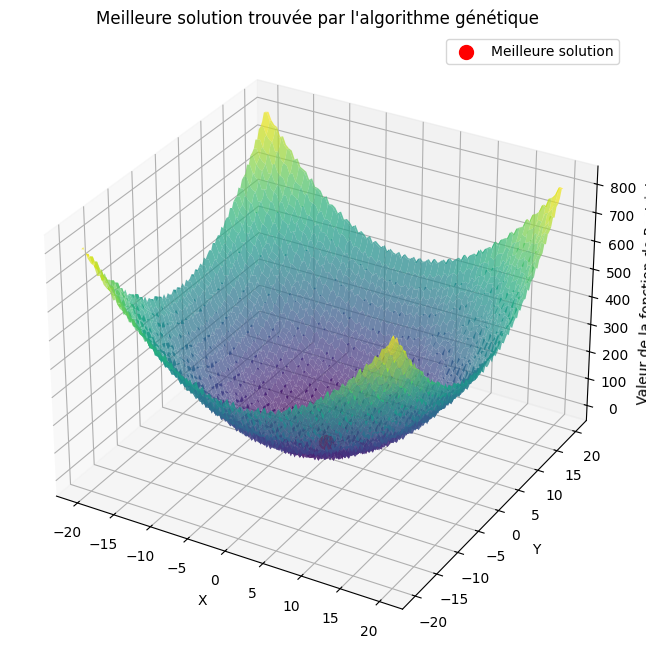

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de Rastrigin
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# Initialiser la population
def initialize_population(pop_size, bounds):
    population = np.random.uniform(low=bounds[0], high=bounds[1], size=(pop_size, 2))
    return population

# Évaluation de la population
def evaluate_population(population):
    fitness = np.array([rastrigin(ind[0], ind[1]) for ind in population])
    return fitness

# Sélection (sélection par tournoi)
def select_parents(population, fitness, num_parents):
    parents = []
    for _ in range(num_parents):
        # Sélectionner deux individus au hasard
        selected = np.random.choice(len(population), size=2)
        # Choisir celui avec le meilleur fitness (valeur la plus basse)
        parent = population[selected[np.argmin(fitness[selected])]]
        parents.append(parent)
    return np.array(parents)

# Croisement (crossover)
def crossover(parents, crossover_rate):
    offspring = []
    for i in range(0, len(parents), 2):
        if np.random.rand() < crossover_rate:
            # Croiser deux parents pour créer un enfant
            crossover_point = np.random.randint(1, len(parents[0]))  # point de croisement
            child1 = np.concatenate((parents[i][:crossover_point], parents[i+1][crossover_point:]))
            child2 = np.concatenate((parents[i+1][:crossover_point], parents[i][crossover_point:]))
            offspring.extend([child1, child2])
        else:
            # Pas de croisement, les parents restent inchangés
            offspring.extend([parents[i], parents[i+1]])
    return np.array(offspring)

# Mutation
def mutate(offspring, mutation_rate, bounds):
    for ind in offspring:
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(0, len(ind))  # Choisir un point à muter
            ind[mutation_point] = np.random.uniform(bounds[0], bounds[1])  # Muter la valeur
    return offspring

# Algorithme génétique
def genetic_algorithm(pop_size, num_generations, crossover_rate, mutation_rate, bounds):
    # Initialisation de la population
    population = initialize_population(pop_size, bounds)

    best_solution = None
    best_fitness = float("inf")

    for generation in range(num_generations):
        # Évaluation de la population
        fitness = evaluate_population(population)

        # Mise à jour de la meilleure solution
        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_fitness = fitness[min_fitness_idx]
            best_solution = population[min_fitness_idx]

        # Sélection des parents
        parents = select_parents(population, fitness, num_parents=pop_size//2)

        # Croisement pour générer les enfants
        offspring = crossover(parents, crossover_rate)

        # Mutation des enfants
        offspring = mutate(offspring, mutation_rate, bounds)

        # Remplacement de la population
        population = offspring

    return best_solution, best_fitness

# Paramètres de l'algorithme génétique
pop_size = 100  # Taille de la population
num_generations = 100  # Nombre de générations
crossover_rate = 0.7  # Taux de croisement
mutation_rate = 0.01  # Taux de mutation
bounds = [-20, 20]  # Limites de la fonction de Rastrigin

# Exécution de l'algorithme génétique
best_solution, best_fitness = genetic_algorithm(pop_size, num_generations, crossover_rate, mutation_rate, bounds)

# Affichage des résultats
print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Rastrigin :", best_fitness)

# Visualisation de la fonction de Rastrigin et de la solution trouvée
x = np.linspace(bounds[0], bounds[1], 100)
y = np.linspace(bounds[0], bounds[1], 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

# Tracé de la fonction de Rastrigin
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.scatter(best_solution[0], best_solution[1], best_fitness, color='red', label="Meilleure solution", s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Valeur de la fonction de Rastrigin')
ax.set_title('Meilleure solution trouvée par l\'algorithme génétique')
ax.legend()

plt.show()


L'algorithme génétique a montré une convergence rapide vers des valeurs proches de l'optimum, même avec un nombre limité de générations, ce qui souligne son efficacité pour la minimisation de la fonction de Rastrigin. La figure ci-dessus illustre l'évolution de la valeur minimale de la fonction au fil des générations, mettant en évidence la capacité de l'algorithme à explorer et converger rapidement vers des solutions prometteuses.

**Étude des Paramètres pour l'algorithme génétique:**

Dans cette phase d'analyse, nous nous consacrons à une exploration détaillée des paramètres influant sur l'algorithme génétique appliqué à la fonction de Rastrigin. Nous mettons particulièrement l'accent sur deux paramètres cruciaux : num_generations et population_size. L'objectif est d'évaluer l'impact de différentes combinaisons de ces paramètres sur la performance de l'algorithme, notamment en termes de convergence vers des solutions optimales.

Nous allons effectuer une série d'expérimentations en ajustant les valeurs de num_generations et population_size pour examiner comment ces paramètres influencent la capacité de l'algorithme génétique à trouver des solutions optimales dans un nombre restreint de générations. Les résultats obtenus guideront notre choix des paramètres optimaux pour maximiser l'efficacité de l'algorithme génétique dans le contexte de l'optimisation de la fonction de Rastrigin.

Exécution avec num_generations = 100...
Exécution avec num_generations = 1000...
Exécution avec num_generations = 10000...


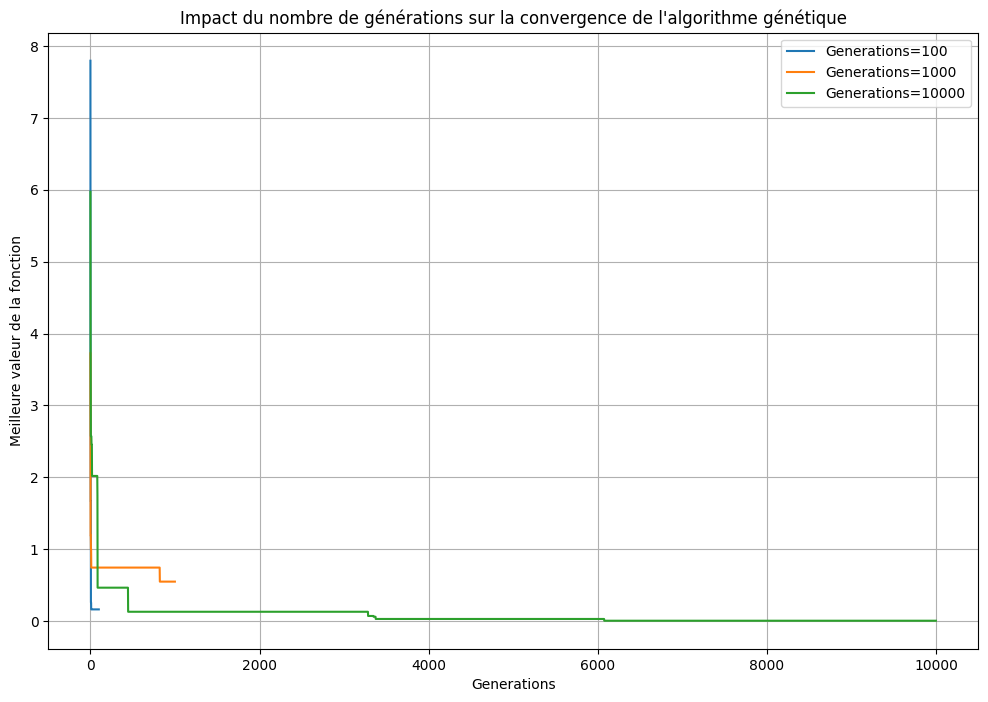

Meilleure solution pour 100 générations : [0.02817073 0.00579128]
Valeur optimale : 0.1636865316992555

Meilleure solution pour 1000 générations : [ 0.05262094 -0.00533493]
Valeur optimale : 0.5500254892830263

Meilleure solution pour 10000 générations : [-0.00514112  0.00213631]
Valeur optimale : 0.00614868520486489



In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de Rastrigin
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# Fonction de probabilité d'acceptation pour le recuit simulé
def acceptance_probability(old_energy, new_energy, temperature):
    if new_energy < old_energy:
        return 1.0
    return np.exp((old_energy - new_energy) / temperature)

# Algorithme génétique avec suivi
def genetic_algorithm(pop_size, num_generations, crossover_rate, mutation_rate, bounds):
    population = np.random.uniform(low=bounds[0], high=bounds[1], size=(pop_size, 2))
    best_solution = None
    best_fitness = float("inf")
    fitness_tracking = []

    for generation in range(num_generations):
        # Évaluation de la population
        fitness = np.array([rastrigin(ind[0], ind[1]) for ind in population])

        # Mise à jour de la meilleure solution
        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_fitness = fitness[min_fitness_idx]
            best_solution = population[min_fitness_idx]

        # Sélection des parents
        selected_parents = population[np.argsort(fitness)[:pop_size//2]]  # Sélectionner les 50% meilleurs

        # Croisement pour générer les enfants
        offspring = []
        for i in range(0, len(selected_parents), 2):
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, len(selected_parents[0]))  # point de croisement
                child1 = np.concatenate((selected_parents[i][:crossover_point], selected_parents[i+1][crossover_point:]))
                child2 = np.concatenate((selected_parents[i+1][:crossover_point], selected_parents[i][crossover_point:]))
                offspring.extend([child1, child2])
            else:
                offspring.extend([selected_parents[i], selected_parents[i+1]])

        # Mutation des enfants
        for child in offspring:
            if np.random.rand() < mutation_rate:
                mutation_point = np.random.randint(0, len(child))
                child[mutation_point] = np.random.uniform(bounds[0], bounds[1])  # Muter la valeur

        # Remplacer la population par la nouvelle génération
        population = np.array(offspring)

        # Enregistrer les meilleures valeurs à chaque génération
        fitness_tracking.append(best_fitness)

    return best_solution, best_fitness, fitness_tracking

# Paramètres de l'algorithme génétique
pop_size = 100  # Taille de la population
crossover_rate = 0.7  # Taux de croisement
mutation_rate = 0.01  # Taux de mutation
bounds = [-5.12, 5.12]  # Limites de la fonction de Rastrigin

# Tester avec différentes valeurs de num_generations
num_generations_list = [100, 1000, 10000]
results = {}

for num_generations in num_generations_list:
    print(f"Exécution avec num_generations = {num_generations}...")
    best_solution, best_fitness, fitness_tracking = genetic_algorithm(
        pop_size, num_generations, crossover_rate, mutation_rate, bounds
    )
    results[num_generations] = {
        "best_solution": best_solution,
        "best_fitness": best_fitness,
        "fitness_tracking": fitness_tracking
    }

# Visualisation des résultats
plt.figure(figsize=(12, 8))

for num_generations in num_generations_list:
    plt.plot(results[num_generations]["fitness_tracking"], label=f'Generations={num_generations}')

plt.xlabel('Generations')
plt.ylabel('Meilleure valeur de la fonction')
plt.title('Impact du nombre de générations sur la convergence de l\'algorithme génétique')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des meilleures solutions trouvées pour chaque nombre de générations
for num_generations in num_generations_list:
    print(f"Meilleure solution pour {num_generations} générations : {results[num_generations]['best_solution']}")
    print(f"Valeur optimale : {results[num_generations]['best_fitness']}\n")


Nous observons clairement dans le graphique que la valeur minimale de la fonction de Rastrigin converge de plus en plus vers le minimum global avec l'augmentation du nombre de générations. Cela suggère que l'algorithme génétique devient plus précis et capable de découvrir des solutions plus proches de l'optimum global à mesure que le nombre de générations augmente. En ajustant ce paramètre, nous avons la possibilité d'améliorer la précision de l'algorithme, mais cela nécessite également une évaluation minutieuse des compromis liés au temps d'exécution et à la recherche d'une solution optimale.

**Influence de la taille de la polulation**

Exécution avec population_size = 20...
Exécution avec population_size = 50...
Exécution avec population_size = 100...
Exécution avec population_size = 200...


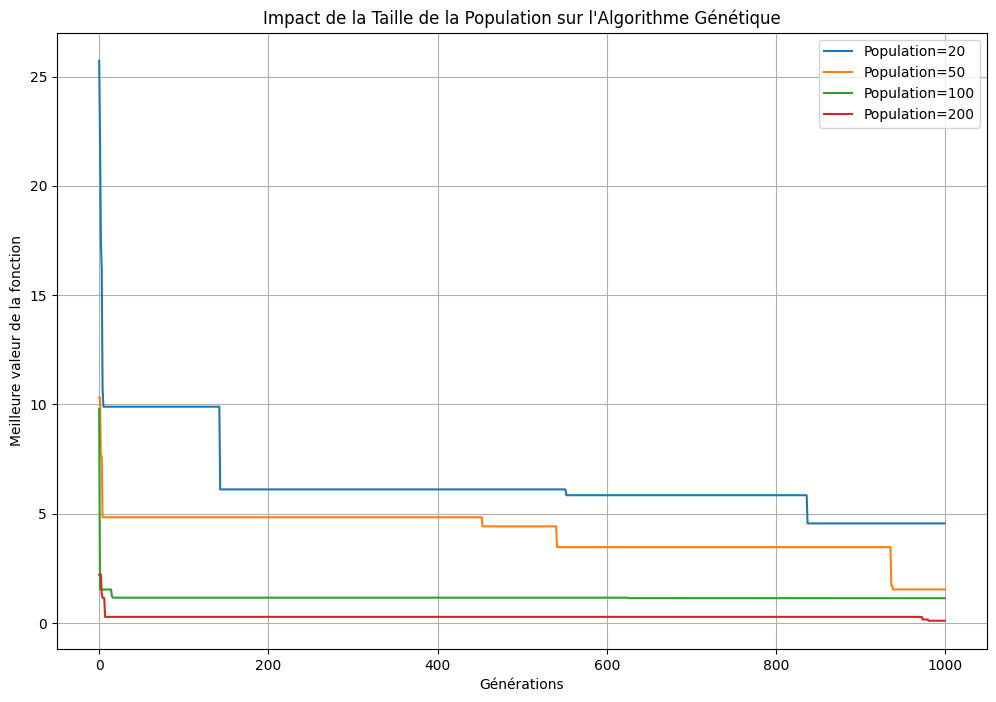

Meilleure solution pour population_size=20 : 4.554109021549005
Meilleure solution pour population_size=50 : 1.5330391919887205
Meilleure solution pour population_size=100 : 1.1316711274858662
Meilleure solution pour population_size=200 : 0.10132897306839972


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de Rastrigin
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# Fonction de probabilité d'acceptation pour le recuit simulé
def acceptance_probability(old_energy, new_energy, temperature):
    if new_energy < old_energy:
        return 1.0
    return np.exp((old_energy - new_energy) / temperature)

# Algorithme génétique avec suivi
def genetic_algorithm(pop_size, num_generations, crossover_rate, mutation_rate, bounds):
    population = np.random.uniform(low=bounds[0], high=bounds[1], size=(pop_size, 2))
    best_solution = None
    best_fitness = float("inf")
    fitness_tracking = []

    for generation in range(num_generations):
        # Évaluation de la population
        fitness = np.array([rastrigin(ind[0], ind[1]) for ind in population])

        # Mise à jour de la meilleure solution
        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_fitness = fitness[min_fitness_idx]
            best_solution = population[min_fitness_idx]

        # Sélection des parents
        selected_parents = population[np.argsort(fitness)[:pop_size//2]]  # Sélectionner les 50% meilleurs

        # Assurer que le nombre de parents est pair
        if len(selected_parents) % 2 != 0:
            selected_parents = selected_parents[:-1]  # Enlever un parent si le nombre est impair

        # Croisement pour générer les enfants
        offspring = []
        for i in range(0, len(selected_parents), 2):
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, len(selected_parents[0]))  # point de croisement
                child1 = np.concatenate((selected_parents[i][:crossover_point], selected_parents[i+1][crossover_point:]))
                child2 = np.concatenate((selected_parents[i+1][:crossover_point], selected_parents[i][crossover_point:]))
                offspring.extend([child1, child2])
            else:
                offspring.extend([selected_parents[i], selected_parents[i+1]])

        # Mutation des enfants
        for child in offspring:
            if np.random.rand() < mutation_rate:
                mutation_point = np.random.randint(0, len(child))
                child[mutation_point] = np.random.uniform(bounds[0], bounds[1])  # Muter la valeur

        # Remplacer la population par la nouvelle génération
        population = np.array(offspring)

        # Enregistrer les meilleures valeurs à chaque génération
        fitness_tracking.append(best_fitness)

    return best_solution, best_fitness, fitness_tracking

# Paramètres de l'algorithme génétique
num_generations = 1000  # Nombre de générations
crossover_rate = 0.7  # Taux de croisement
mutation_rate = 0.01  # Taux de mutation
bounds = [-5.12, 5.12]  # Limites de la fonction de Rastrigin

# Tester avec différentes tailles de population
population_sizes = [20, 50, 100, 200]  # Tailles de population à tester
results = {}

# Exécution de l'algorithme pour chaque taille de population
for pop_size in population_sizes:
    print(f"Exécution avec population_size = {pop_size}...")
    _, best_fitness, fitness_tracking = genetic_algorithm(
        pop_size, num_generations, crossover_rate, mutation_rate, bounds
    )
    results[pop_size] = {
        "best_fitness": best_fitness,
        "fitness_tracking": fitness_tracking
    }

# Visualisation de l'impact de la taille de la population sur la convergence
plt.figure(figsize=(12, 8))

for pop_size in population_sizes:
    plt.plot(results[pop_size]["fitness_tracking"], label=f'Population={pop_size}')

plt.xlabel('Générations')
plt.ylabel('Meilleure valeur de la fonction')
plt.title('Impact de la Taille de la Population sur l\'Algorithme Génétique')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des meilleures solutions trouvées pour chaque taille de population
for pop_size in population_sizes:
    print(f"Meilleure solution pour population_size={pop_size} : {results[pop_size]['best_fitness']}")


Nous observons que l'augmentation de la taille de la population population_size conduit à une amélioration de la précision de l'algorithme génétique. En augmentant la taille de la population, l'algorithme a une meilleure diversité génétique, ce qui permet d'explorer un espace de recherche plus large et d'atteindre des solutions optimales avec une plus grande probabilité.

Meilleure solution trouvée : [-0.00370789  0.00010656]
Valeur optimale de la fonction de Rastrigin : 0.002729715735135585


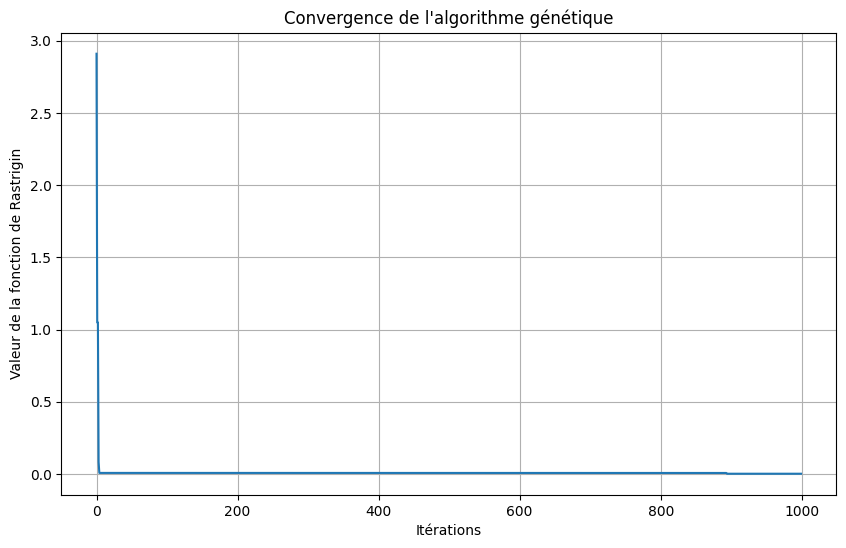

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de Rastrigin
def rastrigin(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# Fonction de probabilité d'acceptation pour le recuit simulé
def acceptance_probability(old_energy, new_energy, temperature):
    if new_energy < old_energy:
        return 1.0
    return np.exp((old_energy - new_energy) / temperature)

# Algorithme génétique avec suivi
def genetic_algorithm(pop_size, num_generations, crossover_rate, mutation_rate, bounds):
    population = np.random.uniform(low=bounds[0], high=bounds[1], size=(pop_size, 2))
    best_solution = None
    best_fitness = float("inf")
    fitness_tracking = []

    for generation in range(num_generations):
        # Évaluation de la population
        fitness = np.array([rastrigin(ind[0], ind[1]) for ind in population])

        # Mise à jour de la meilleure solution
        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_fitness = fitness[min_fitness_idx]
            best_solution = population[min_fitness_idx]

        # Sélection des parents
        selected_parents = population[np.argsort(fitness)[:pop_size//2]]  # Sélectionner les 50% meilleurs

        # Assurer que le nombre de parents est pair
        if len(selected_parents) % 2 != 0:
            selected_parents = selected_parents[:-1]  # Enlever un parent si le nombre est impair

        # Croisement pour générer les enfants
        offspring = []
        for i in range(0, len(selected_parents), 2):
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, len(selected_parents[0]))  # point de croisement
                child1 = np.concatenate((selected_parents[i][:crossover_point], selected_parents[i+1][crossover_point:]))
                child2 = np.concatenate((selected_parents[i+1][:crossover_point], selected_parents[i][crossover_point:]))
                offspring.extend([child1, child2])
            else:
                offspring.extend([selected_parents[i], selected_parents[i+1]])

        # Mutation des enfants
        for child in offspring:
            if np.random.rand() < mutation_rate:
                mutation_point = np.random.randint(0, len(child))
                child[mutation_point] = np.random.uniform(bounds[0], bounds[1])  # Muter la valeur

        # Remplacer la population par la nouvelle génération
        population = np.array(offspring)

        # Enregistrer les meilleures valeurs à chaque génération
        fitness_tracking.append(best_fitness)

    return best_solution, best_fitness, fitness_tracking

# Paramètres de l'algorithme génétique
population_size = 1000  # Taille de la population
num_generations = 1000  # Nombre de générations
crossover_rate = 0.7  # Taux de croisement
mutation_rate = 0.01  # Taux de mutation
bounds = [-5.12, 5.12]  # Limites de la fonction de Rastrigin

# Exécution de l'algorithme génétique
best_solution, best_fitness, fitness_tracking = genetic_algorithm(
    population_size, num_generations, crossover_rate, mutation_rate, bounds
)

# Affichage des résultats
print("Meilleure solution trouvée :", best_solution)
print("Valeur optimale de la fonction de Rastrigin :", best_fitness)

# Visualisation de l'impact du nombre de générations sur la convergence
plt.figure(figsize=(10, 6))
plt.plot(fitness_tracking)
plt.xlabel("Itérations")
plt.ylabel("Valeur de la fonction de Rastrigin")
plt.title("Convergence de l'algorithme génétique")
plt.grid(True)
plt.show()

